In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

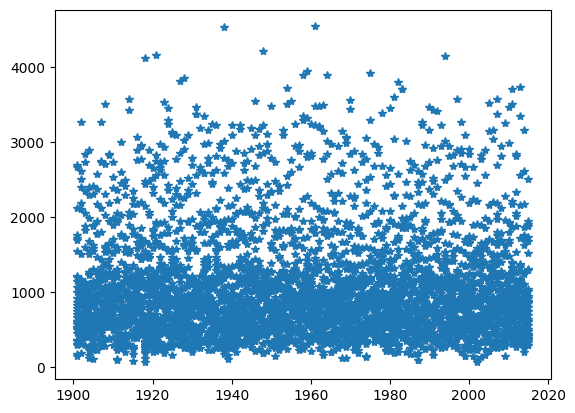

In [ ]:
import numpy as np
x=pd.read_csv("rainfall in india 1901-2015.csv")
y=pd.read_csv("rainfall in india 1901-2015.csv")

y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'*')
plt.show()

In [ ]:
flood=[]
june=[]
sub=[]

#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#print(x1[114])
for i in range(0,len(x1)):
    if x1[i]>2400:
        flood.append('1')
    else:
        flood.append('0')

#print(len(x1))

#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))

#print(len(flood),len(x1))
df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

x = x.dropna()

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))

                    SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0     ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1     ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2     ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3     ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4     ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   
...                         ...   ...   ...    ...   ...    ...    ...    ...   
4111                LAKSHADWEEP  2011   5.1    2.8   3.1   85.9  107.2  153.6   
4112                LAKSHADWEEP  2012  19.2    0.1   1.6   76.8   21.2  327.0   
4113                LAKSHADWEEP  2013  26.2   34.4  37.5    5.3   88.3  426.2   
4114                LAKSHADWEEP  2014  53.2   16.1   4.4   14.9   57.4  244.1   
4115                LAKSHADWEEP  2015   2.2    0.5   3.7   87.1  133.1  296.6   

        JUL    AUG  ...    

In [ ]:
df = pd.read_csv('/content/out1.csv')
df.head()

,Unnamed: 0,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,flood,avgjune,sub
0,0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,...,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,0,172.500000,11.3
1,1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,...,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,0,179.033333,91.0
2,2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,...,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,0,159.966667,244.8
3,3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,...,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,0,165.033333,190.6
4,4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,...,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,0,209.566667,349.2


In [ ]:
import scipy
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING

X = df[{'Mar-May', 'avgjune', 'sub'}]
y = df['flood']

(X_train, X_test, Y_train, Y_test) = train_test_split(X, y, random_state=42, test_size=0.2)

model=LogisticRegression()

model.fit(X_train,Y_train)
print(model.score(X_train, Y_train))

0.9636308068459658


<ipython-input-6-491cf14df916>:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[{'Mar-May', 'avgjune', 'sub'}]


In [ ]:
q1=275 # present years march to may rainfall data on average
w1=130 #average rainfall in past 10 days of june
e1=260 #average inscrease in rainfall from may to june


l=[[q1,w1,e1],[200,400,300]]

#print(X)

#ypred=Lr.predict(X)
f1=model.predict(l)

for i in range(len(f1)):

    if (int(f1[i])==1):
        print(f1[i],"- possibility of  severe flood")
    else:
        print(f1[i],"- no chance of severe flood")


0 - no chance of severe flood
1 - possibility of  severe flood


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('model.pkl','wb'))